# Cell Counter
By Zoë McGinnis

## Loading in your image
The first thing we need to do is load in the pre-cropped image of the cell slide. Please put the image in the folder called "originals" and set `filename` to the name of the image you want to use. 

In [29]:
# CHANGE AS NEEDED TO SAY NAME OF IMAGE
filename = "sample.png" #"Round1_Swab_Trans.png"

## Install libraries (only need to run once)
Run this code block to install the libraries needed to run this program. You should only have to do this the very first time you use it.

In [42]:
%pip install matplotlib opencv-python Pillow


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Import necessary libraries

In [46]:
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image

## Resizing code
This code block opens the image, resizes it so that the image processing library I'm using (OpenCV) can handle it and saves it in a folder called "resized."

In [48]:
f_originals = "originals/"
img_name = f_originals+filename
img = Image.open(img_name)
width, height = img.size
resized = img.resize((round(width/2), round(height/2)), Image.LANCZOS)
new_img_name = filename.split(".")[0] + "_small.png"
resized.save(new_img_name)

/var/folders/px/z2sj3k8915xc72kmlt6jfhqc0000gn/T/ipykernel_27585/150246366.py:5: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized = img.resize((round(width/2), round(height/2)), Image.LANCZOS)


## Opening multiple instances of the resized image
Here I'm opening multiple instances of the resized image for plotting purposes, then deleting the resized file.

In [49]:
im = cv2.imread(new_img_name)
im_c = cv2.imread(new_img_name)
img = cv2.imread(new_img_name, cv2.IMREAD_GRAYSCALE)
os.remove(new_img_name)

## Image processing and contour finding
Here I apply Gaussian filtering and Otsu thresholding, which makes OpenCV's built-in contour finding method work more reliably. Then I use the findContours method to find places in the image where the color changes, i.e., the cells.

In [50]:
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Find and draw contours
ret,thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
image = cv2.drawContours(im_c, contours, -1, (255,0,0), 1)
num_cells = len(contours)

## Visualization
This block of code visualizes the cells found, outputting a plot of the original image and the cells outlined in red. This is a good way to ensure the code is working the way we think it is.

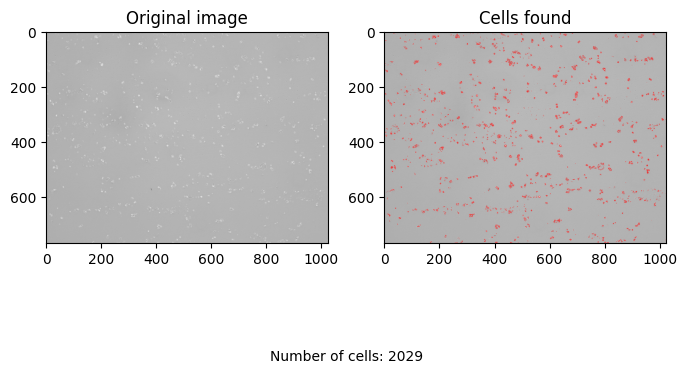

In [34]:
# Output cells found plot
fig = plt.figure(figsize=(8,5))
text = "Number of cells: {}".format(num_cells)
fig.text(.5, .05, text, ha='center')
plt.subplot(1,2,1),plt.title('Original image'),plt.imshow(im)
plt.subplot(1,2,2),plt.title('Cells found'),plt.imshow(image)
plt.show()

## Raw output of number of cells
In case you hate the visualization I made for some reason, you can always just run this code block to get the number of cells as a raw text output.

In [40]:
# Output number of cells
print('Number of cells: {}'.format(num_cells))

Number of cells: 2029
